# Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
df = pd.read_csv("flight_price.csv")

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [7]:
# there are 10683 rows and 11 columns in the fligh_price dataset

.

#### Q2. What is the distribution of flight prices in the dataset?

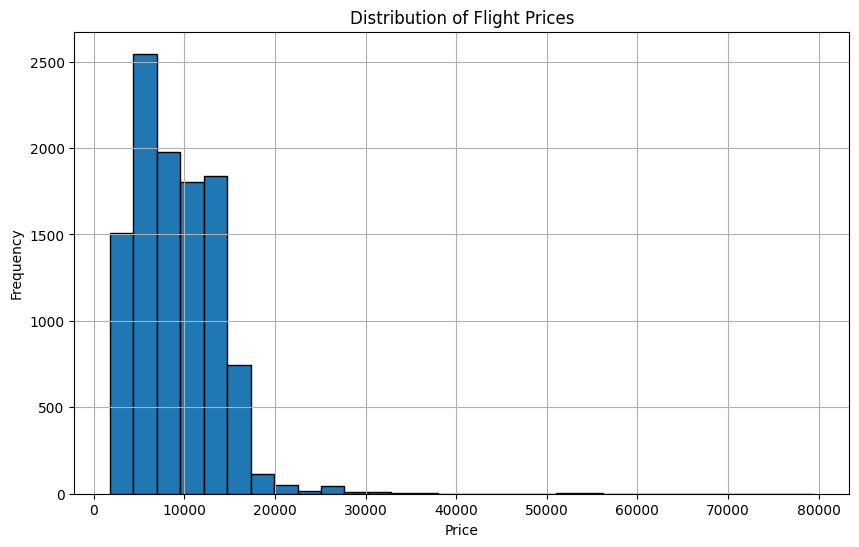

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

.

#### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [25]:
min_price = df['Price'].min()
max_price = df['Price'].max()
range_of_price = max_price - min_price

print(f"maximum price is: {max_price}")
print(f"minimum price is: {min_price}")
print(f"range of price: {range_of_price}")

maximum price is: 79512
minimum price is: 1759
range of price: 77753


.

#### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

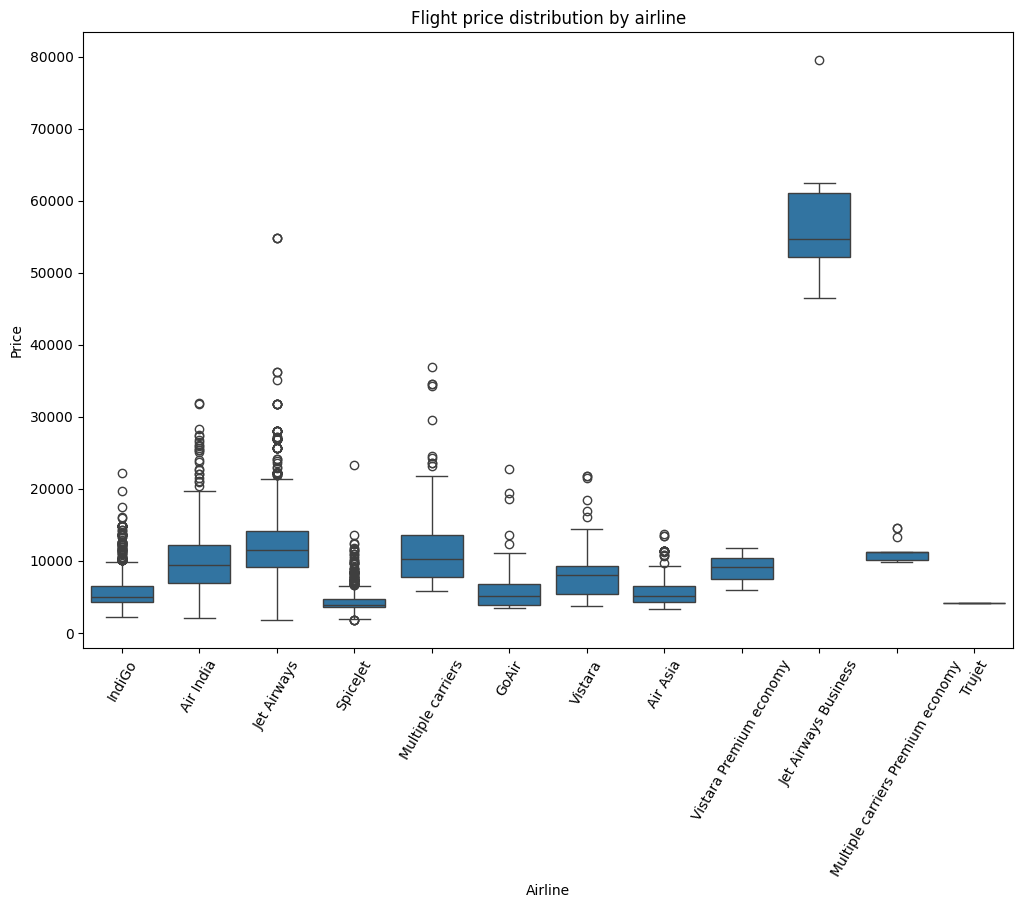

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Airline",y="Price",data=df)
plt.title("Flight price distribution by airline")
plt.xticks(rotation=60)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

.

#### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

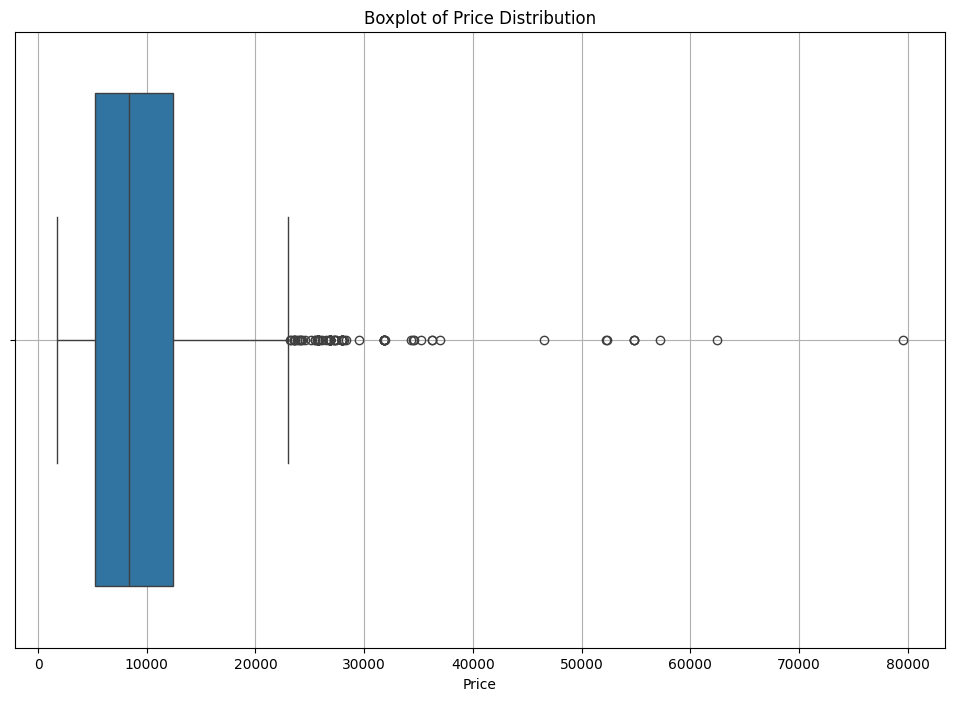

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Price',data=df)
plt.title("Boxplot of Price Distribution")
plt.xlabel("Price")
plt.grid(True)
plt.show()

In a boxplot, outliers are typically represented as points outside the "whiskers" of the box. These whiskers generally extend to 1.5 times the interquartile range (IQR) from the quartiles. Data points outside this range are considered outliers.

Statistical Measures: Outliers can skew statistical measures such as the mean and variance, potentially leading to misleading conclusions if not accounted for.

Modeling: In predictive modeling, outliers might affect the performance of models, particularly those sensitive to extreme values. It may be necessary to handle outliers through transformation, removal, or special modeling techniques.

.

#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [39]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [40]:
df['Date'] = pd.to_datetime(df['Date_of_Journey'])

C:\Users\Ali Samin\AppData\Local\Temp\ipykernel_22484\1892266540.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01


In [45]:
df['Month'] = df['Date'].dt.month

In [47]:
df['Year'] = df['Date'].dt.year

In [53]:
monthly_avg_price = df.groupby(['Month','Year'])['Price'].mean().reset_index()

In [54]:
monthly_avg_price

,Month,Year,Price
0,3,2019,10673.205580
1,4,2019,5770.847081
2,5,2019,9127.247548
3,6,2019,8828.796134


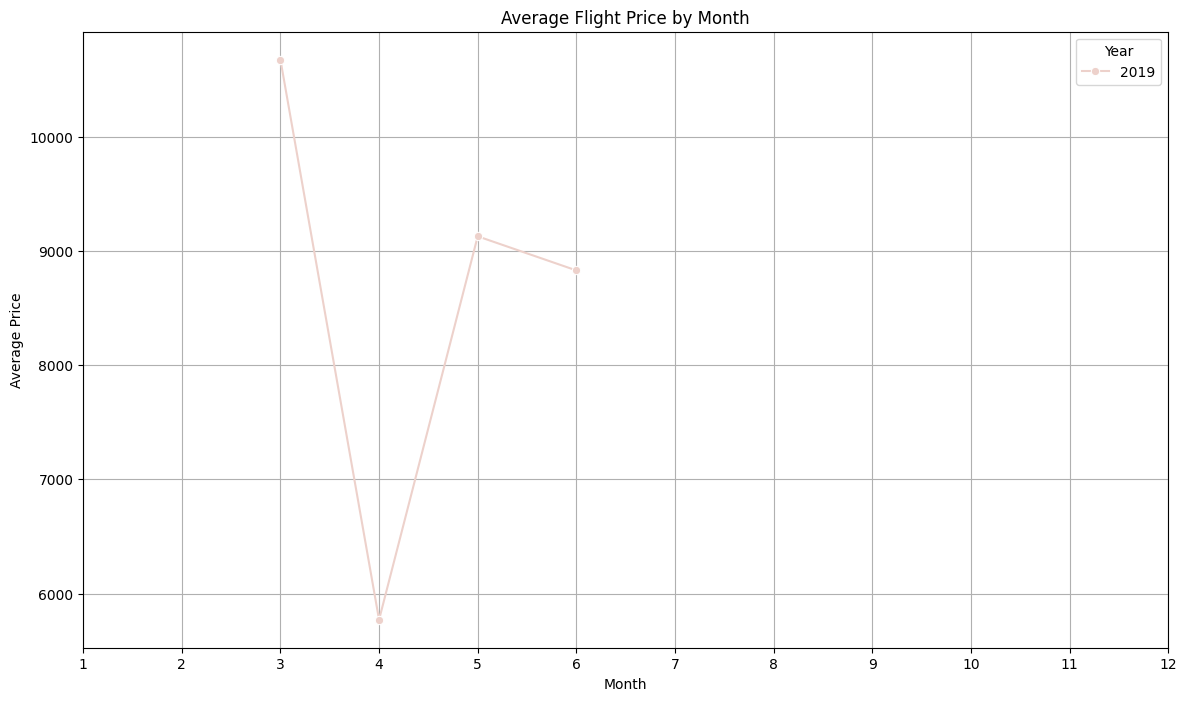

In [62]:
plt.figure(figsize=(14,8))
sns.lineplot(x="Month",y="Price",hue="Year",data=monthly_avg_price,marker='o')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


To identify the peak travel season, analyze the following features:

Travel Date/Month: Group data by month/season to observe price and flight volume trends.

Price: Track price fluctuations to identify high-demand periods.

Booking Date: Look at when most bookings are made to correlate with travel dates.

.

#### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

Key Features to Analyze:

Date/Time: Analyze Date, Month, or Year to identify temporal trends.

Route: Look at Origin and Destination to see if specific routes have consistent price trends.

Airline: Compare prices across different airlines.

Day of the Week: Prices often vary by the day of the week (e.g., weekends vs. weekdays).

Flight Duration/Distance: Longer or more complex routes might show different price trends.

Class of Service: Prices can vary significantly between economy, business, and first class.

In this we use the following visualization:
    
Line Plot: To show price trends over time (daily, monthly, yearly).

Boxplot: To compare price distributions across different airline.
    
Bar Chart: To compare average prices across different routes or airlines.

.

#### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Key Features to Analyze:

Date/Time:

Travel Date/Time: Prices might vary based on the time of year (seasonality), day of the week, or time of day.

Booking Date: Early bookings vs. last-minute bookings can have different price points.

Route Characteristics:

Origin and Destination: Certain routes may have higher demand, influencing prices.

Flight Duration/Distance: Longer flights or those covering more distance typically have higher prices.

Airline:

Prices can vary between airlines due to brand, service quality, or pricing strategies.

Class of Service:

Analyze how prices differ between economy, business, and first class.

Visualizations:

Boxplots:

Compare flight prices across different airlines, routes, and classes of service.

Scatter Plots:

Use scatter plots to visualize relationships between flight prices and continuous variables like distance or booking time.

.

# Google Playstore:

#### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [63]:
df = pd.read_csv("googleplaystore.csv")

In [64]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
df.shape

(10841, 13)

In [66]:
# there are 10841 rows and 13 columns in the googleplaystore dataset

.

#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

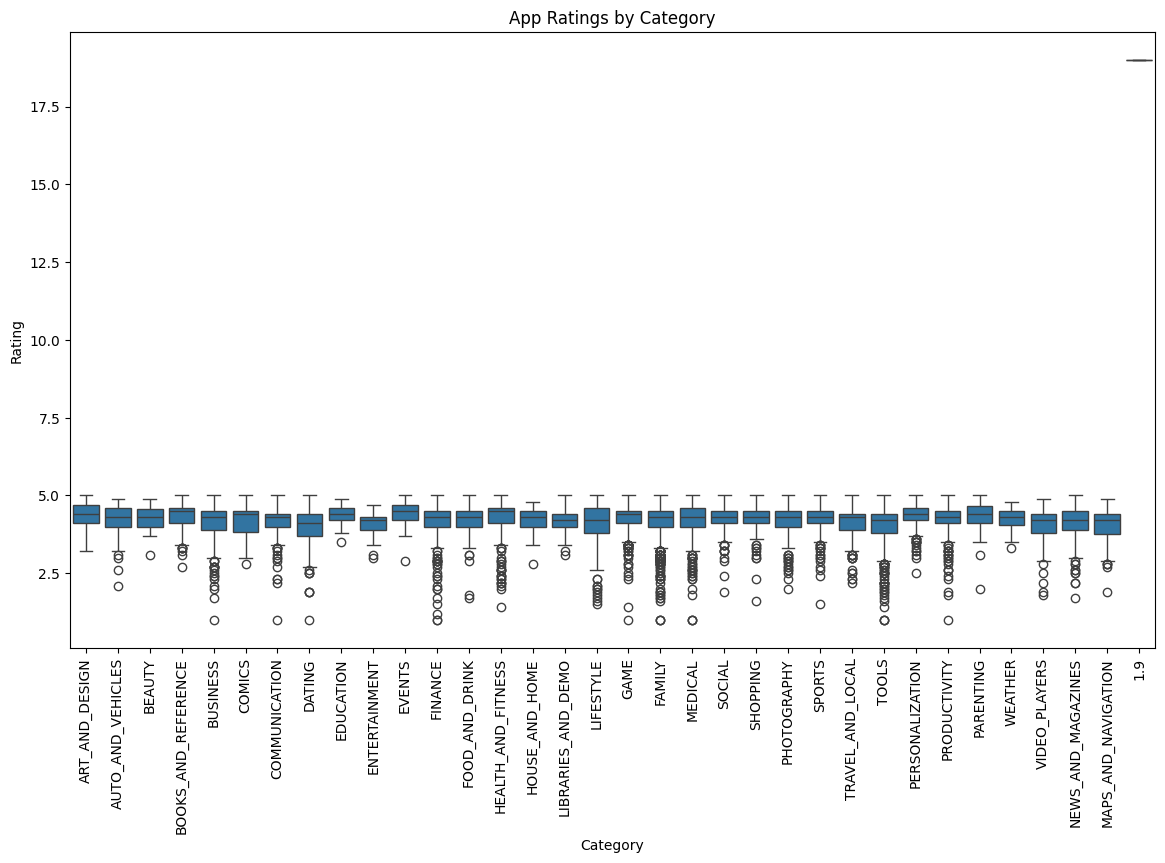

In [75]:
plt.figure(figsize=(14,8))
sns.boxplot(x="Category",y="Rating",data=df)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

#### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [80]:
missing_values = df.isnull().sum()

In [81]:
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [82]:
missing_col = missing_values[missing_values>0]

In [85]:
print(f"Column which have missing values: \n{missing_col}")

Column which have missing values: 
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


.

#### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [86]:
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)

In [87]:
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [88]:
df = df.dropna(subset=['Size','Rating'])

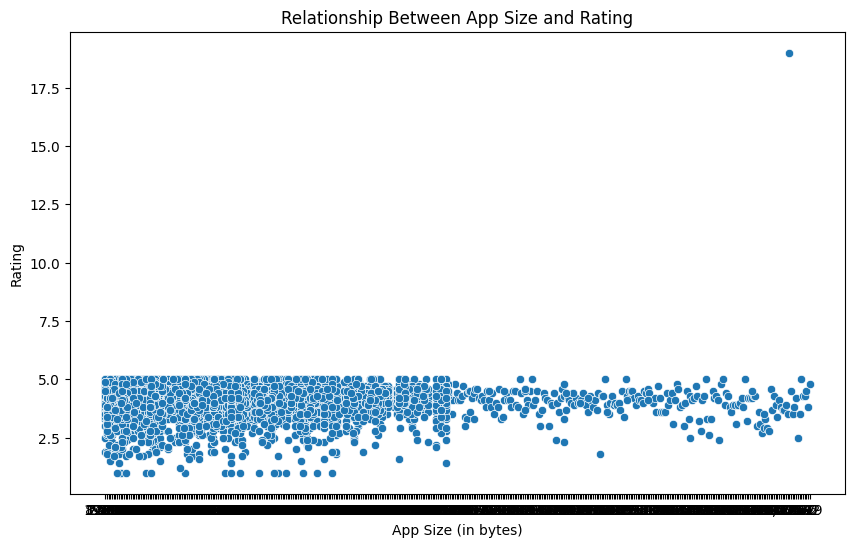

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size',y='Rating',data = df)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('App Size (in bytes)')
plt.ylabel('Rating')
plt.show()

.